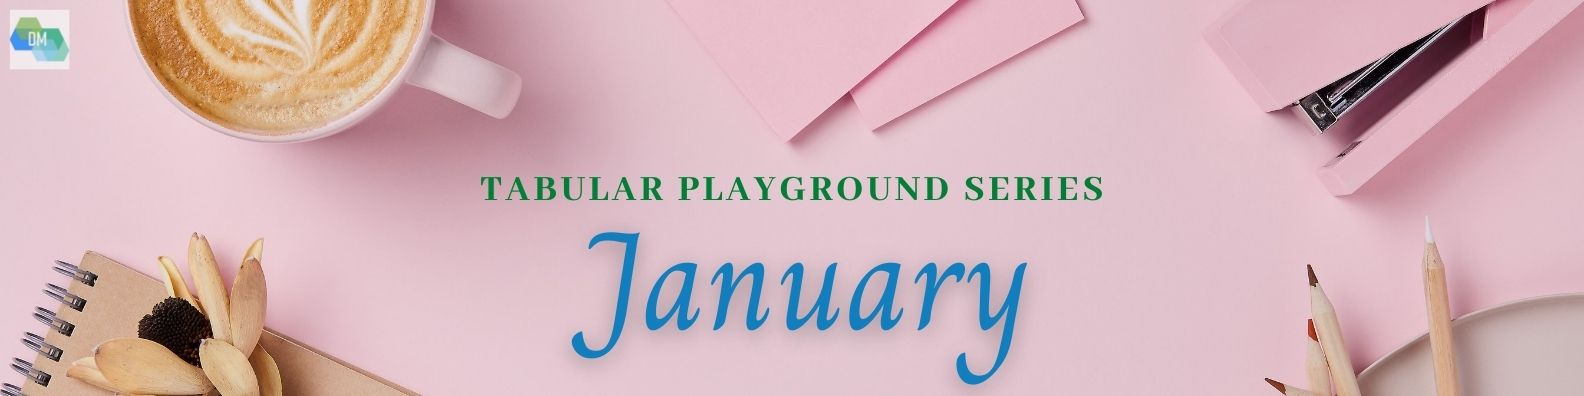

**Observations on this TPS dataset:**
- `num_sold` column is the target variable
- `Train` dataset has `26298` rows and `6` columns which contains`4` features, `1` target variable `num_sold` and `1` column of `row_id`
- `Test` dataset has `6570` rows and `5` columns which contains`4` features with`1` column of `row_id`
- No missing values in train and test dataset

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
df_train = pd.read_csv("../input/tabular-playground-series-jan-2022/train.csv",index_col = 'row_id')
df_test = pd.read_csv("../input/tabular-playground-series-jan-2022/test.csv",index_col = 'row_id')
df_subm = pd.read_csv("../input/tabular-playground-series-jan-2022/sample_submission.csv",index_col = 'row_id')

In [ ]:
#Custom Color Palette 🎨
custom_colors = ["#ff002b","#0ead69","#9381ff"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [ ]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count) 
print('Total number of columns:', df_train_column_count)

In [ ]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count) 

In [ ]:
df_train.head()

In [ ]:
df_train.describe().T

In [ ]:
df_train.info()

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['year']=df_train['date'].dt.year
df_train['month']=df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_yr'] = df_train['date'].dt.dayofyear
print(df_train.info())

In [ ]:
df_test['date'] = pd.to_datetime(df_test['date'])
df_test['year']=df_test['date'].dt.month
df_test['month']=df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day
df_test['day_of_yr'] = df_test['date'].dt.dayofyear
print(df_test.info())

In [ ]:
print('Duration (Train Date): ', df_train['date'].min(), df_train['date'].max())
print('Duration (Test Date): ', df_test['date'].min(), df_test['date'].max())

In [ ]:
data = df_train.groupby('year').agg({'num_sold':'mean'}).reset_index()

In [ ]:
data.head()

In [ ]:
fig = plt.subplots(1, 1, figsize=(12, 9))
sns.barplot(df_train['year'],df_train['num_sold'],hue=df_train['country'])
plt.show()

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_train.isna().sum()

In [ ]:
df_test.isna().sum()

In [ ]:
print ("Unique values are:\n",df_train.nunique())

In [ ]:
sns.distplot(df_train['num_sold'])

In [ ]:
df_train.store.unique()

In [ ]:
df_train.country.unique()

In [ ]:
country1 = df_train[df_train.country == 'Finland']
country1 = pd.DataFrame(country1.groupby('product')['num_sold'].sum()).reset_index()
country2 = df_train[df_train.country == 'Norway']
country2 = pd.DataFrame(country2.groupby('product')['num_sold'].sum()).reset_index()
country3 = df_train[df_train.country == 'Sweden']
country3 = pd.DataFrame(country3.groupby('product')['num_sold'].sum()).reset_index()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values = df_train['num_sold'],labels = df_train['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 13, hoverinfo ='label+percent',textinfo='label+percent', showlegend = False,marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales'))  
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country1['num_sold'],labels = country1['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Finland'))  
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country2['num_sold'],labels = country2['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Norway'))  
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values = country3['num_sold'],labels = country3['product'],hole = 0.6, hoverinfo ='label+percent'))
fig.update_traces(textfont_size=13, hoverinfo ='label+percent',textinfo='label+percent',showlegend = False, marker = dict(colors =["#ff002b","#0ead69","#9381ff"]),title = dict(text = 'Kaggle Products Sales in Sweden'))  
fig.show()

In [ ]:
store1 = df_train[df_train['store']=='KaggleRama']
store2 = df_train[df_train['store']=='KaggleMart']
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14, 7))
store1.set_index('date').groupby([pd.Grouper(freq='Y'),'country'])['num_sold'].mean().unstack().plot(ax=ax0)
store2.set_index('date').groupby([pd.Grouper(freq='Y'),'country'])['num_sold'].mean().unstack().plot(ax=ax1)
ax0.set_title('Products Sold by KaggleRama')
ax1.set_title('Products Sold by KaggleMart')
ax0.grid(alpha=0.5)
ax1.grid(alpha=0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_month = df_train.set_index('date').groupby([pd.Grouper(freq='M')])[['num_sold']].mean()
sns.lineplot(x="date", y="num_sold", data=df_train, ax=ax, label='daily',color='#9381ff')
sns.lineplot(x="date", y="num_sold", data=df_month, ax=ax, label='monthly', color='#ff002b')
ax.set_title('Products Sold - Month wise')
ax.legend()
plt.show()

In [ ]:
df_train["product"].unique()

In [ ]:
fig = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(df_train['product'],df_train['num_sold'],hue=df_train['country'])
plt.show()

In [ ]:
fig = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(x="day_of_yr", y="num_sold", data=df_train, hue="product")
plt.show()

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>PyCaret </centre></strong></h3>

In [ ]:
!pip install pycaret[full]

In [ ]:
from pycaret.regression import *

In [ ]:
model = setup(data = df_train, target = 'num_sold', normalize = True, normalize_method = 'robust', use_gpu = True, feature_interaction = True, n_jobs = -1, session_id = 1, data_split_shuffle = False,transform_target = True,create_clusters = False)

In [ ]:
models()

In [ ]:
top_per = compare_models(n_select = 3)

In [ ]:
blend = blend_models(top_per)
predict_model(blend);

In [ ]:
final_blend = finalize_model(blend)
predict_model(final_blend);

In [ ]:
pred_blend = predict_model(final_blend, data=df_test)
pred_blend.head()

In [ ]:
df_subm = pd.DataFrame(list(zip(df_test.index, pred_blend.Label)),columns = ['row_id', 'num_sold'])
df_subm.to_csv('submission.csv', index = False)
df_subm

<h3 style="font-family: Arial;background-color:#c1fba4;color:black;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks!  </centre></strong></h3>